<a href="https://colab.research.google.com/github/daisysong76/AI-LLM-Computer-vision/blob/main/Resnet50_Skin_Tone_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
dataset_path = '/content/drive/MyDrive/AI4ALL/Train/'
input_shape = (90, 120, 3)
classes = ['Fair_light', 'Medium_tane', 'Dark_deep']
EPOCHS = 50  # Increase the number of epochs
BS = 32


In [4]:
data = []
labels = []

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
for idx, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.exists(class_path):
            print(f"Directory not found: {class_path}")

    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        print(filename)
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=input_shape[:2])
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
        data.append(image)
        labels.append(idx)

F1.jpg
F22.jpg
F26.jpg
F41.jpg
F33.jpg
F10.jpg
F25.jpg
F34.jpg
F24.jpg
F19.jpg
F13.jpg
F43.jpg
F38.jpg
F31.jpg
F16.jpg
F27.jpg
F20.jpg
F17.jpg
F40.jpg
F37.jpg
F29.jpg
F21.jpg
F18.jpg
F12.jpg
F100.jpg
F30.jpg
F23.jpg
F2.jpg
F39.jpg
F36.jpg
F35.jpg
F3.jpg
F32.jpg
F44.jpg
F4.jpg
F28.jpg
F45.jpg
F42.jpg
F11.jpg
F14.jpg
F15.jpg
F70.jpg
F56.jpg
F55.jpg
F91.jpg
F85.jpg
F96.jpg
F52.jpg
F75.jpg
F46.jpg
F61.jpg
F82.jpg
F77.jpg
F88.jpg
F80.jpg
F63.jpg
F60.jpg
F90.jpg
F58.jpg
F54.jpg
F99.jpg
F86.jpg
F9.jpg
F74.jpg
F98.jpg
F95.jpg
F94.jpg
F62.jpg
F6.jpg
F67.jpg
F8.jpg
F69.jpg
F65.jpg
F76.jpg
F71.jpg
F59.jpg
F78.jpg
F89.jpg
F50.jpg
F48.jpg
F49.jpg
F68.jpg
F47.jpg
F73.jpg
F93.jpg
F53.jpg
F7.jpg
F72.jpg
F66.jpg
F81.jpg
F97.jpg
F92.jpg
F57.jpg
F87.jpg
F5.jpg
F79.jpg
F84.jpg
F64.jpg
F51.jpg
F83.jpg
M65 (2).jpg
M31 (1).jpg
M35 (2).jpg
M52.jpg
M72 (2).jpg
M37 (2).jpg
M22 (2).jpg
M70 (2).jpg
M4.jpg
M18 (1).jpg
M45 (2).jpg
M24 (1).jpg
M35 (1).jpg
M88.jpg
M26 (1).jpg
M47.jpg
M33 (2).jpg
M99 (2).jpg
M25 (1).j

In [11]:
for idx, class_name in enumerate(classes):  # Iterate over each class in the classes list
    class_path = os.path.join(dataset_path, class_name)  # Construct the path to the directory containing images of the current class
    for filename in os.listdir(class_path):  # Iterate over each image file in the class directory
        image_path = os.path.join(class_path, filename)  # Construct the path to the current image file
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=input_shape[:2])  # Load the image and resize it to the target size
        image = tf.keras.preprocessing.image.img_to_array(image)  # Convert the loaded image to a numpy array
        image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Preprocess the image array for MobileNetV2
        data.append(image)  # Append the processed image array to the data list
        labels.append(idx)  # Append the index of the class (acting as a label) to the labels list


In [12]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [13]:
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
train_datagen = datagen.flow(trainX, trainY, batch_size=BS, shuffle=True)

In [17]:
from keras.applications import ResNet50

In [18]:
base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [19]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [21]:
history = model.fit(
    train_datagen,
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS,
    callbacks=[lr_scheduler, early_stopping]  # Add both callbacks
)

Epoch 1/50
18/18 [==============================] - 26s 1s/step - loss: 1.1673 - accuracy: 0.3978 - val_loss: 1.1080 - val_accuracy: 0.4797 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - 22s 1s/step - loss: 1.1241 - accuracy: 0.4158 - val_loss: 1.0157 - val_accuracy: 0.4797 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - 20s 1s/step - loss: 1.0965 - accuracy: 0.4014 - val_loss: 1.0058 - val_accuracy: 0.5068 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - 22s 1s/step - loss: 1.0347 - accuracy: 0.4462 - val_loss: 1.0201 - val_accuracy: 0.4595 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - 21s 1s/step - loss: 1.0485 - accuracy: 0.4444 - val_loss: 0.9819 - val_accuracy: 0.5541 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - 21s 1s/step - loss: 1.0392 - accuracy: 0.4498 - val_loss: 0.9806 - val_accuracy: 0.5405 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - 21s 1s/step - loss: 0.9975 - a

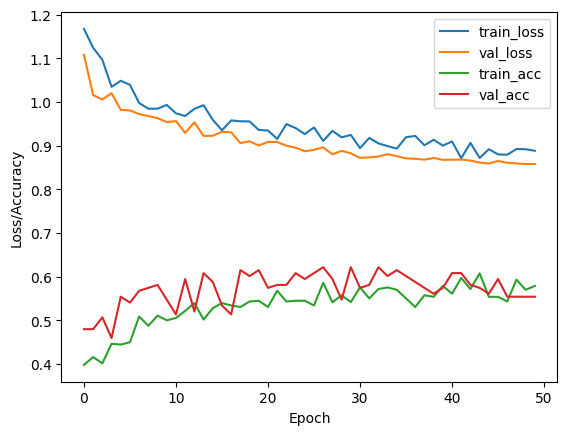

In [22]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()

In [23]:
preds = model.predict(testX)
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(testY, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(testY, y_pred, target_names=classes))

5/5 [==============================] - 6s 943ms/step
Confusion Matrix:
[[12 23  5]
 [15 47  6]
 [ 4 13 23]]
Classification Report:
              precision    recall  f1-score   support

  Fair_light       0.39      0.30      0.34        40
 Medium_tane       0.57      0.69      0.62        68
   Dark_deep       0.68      0.57      0.62        40

    accuracy                           0.55       148
   macro avg       0.54      0.52      0.53       148
weighted avg       0.55      0.55      0.55       148



In [24]:
model.save('/content/drive/MyDrive/AI4ALL/Skin Tone Prediction/model1.h5')
print("Model saved.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved.
